<a href="https://colab.research.google.com/github/GOLISHYAMP/Colab_Notebooks/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steps**:
Create Dataset \
train test split \
model training \
model evaluation \
hyperparameter tunning and cross validation

In [1]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 1000, n_features = 10, n_classes = 2, random_state=31)

In [2]:
X

array([[ 1.69933572, -0.167653  ,  1.30263703, ..., -0.86878831,
        -1.73322198, -1.10002581],
       [ 0.31282155,  0.08309623, -0.67565487, ..., -0.08259831,
        -1.9783943 , -0.27308903],
       [ 1.49902305, -0.03075668,  1.16063156, ...,  0.44401101,
         0.9715134 ,  0.63284074],
       ...,
       [ 0.86085453,  0.00429517,  0.92155423, ...,  0.03714842,
         1.61479637,  0.63111817],
       [-0.57176235, -0.17091332,  0.69341513, ..., -0.17678837,
         0.93289142,  1.85657599],
       [-1.53188828,  0.07460384, -1.50347335, ..., -1.40062073,
        -0.77743256, -0.49440876]])

In [3]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,

In [8]:
from collections import Counter
print(Counter(y))

Counter({1: 500, 0: 500})


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [5]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [6]:
y_pred = logr.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.91
[[89  4]
 [14 93]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        93
           1       0.96      0.87      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



# **Ok lets do hyperparameter tunning and gridSearchCV**

In [17]:
penalty = ['l1', 'l2', 'elasticnet']
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
c_values = [100, 10, 1, 0.1, 0.01]

In [18]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
params = dict(solver=solver, C = c_values, penalty = penalty)

In [19]:
params

{'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'C': [100, 10, 1, 0.1, 0.01],
 'penalty': ['l1', 'l2', 'elasticnet']}

In [20]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=logr, param_grid=params, scoring = 'accuracy', n_jobs=-1, cv = cv)

In [21]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [22]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [23]:
grid.best_score_

0.9087499999999998

In [25]:
y_pred = grid.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.905
[[86  7]
 [12 95]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        93
           1       0.93      0.89      0.91       107

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



In [27]:
model_prob = grid.predict_proba(X_test)


In [30]:
model_prob[:5]

array([[0.49807448, 0.50192552],
       [0.99478387, 0.00521613],
       [0.01196363, 0.98803637],
       [0.92467089, 0.07532911],
       [0.05768604, 0.94231396]])

lets focus of probability of 1

In [31]:
model_prob = model_prob[:,1]

In [32]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, model_prob)

In [33]:
fpr

array([0.        , 0.        , 0.        , 0.01075269, 0.01075269,
       0.02150538, 0.02150538, 0.03225806, 0.03225806, 0.04301075,
       0.04301075, 0.06451613, 0.06451613, 0.07526882, 0.07526882,
       0.08602151, 0.08602151, 0.10752688, 0.10752688, 0.16129032,
       0.16129032, 1.        ])

In [34]:
tpr

array([0.        , 0.00934579, 0.07476636, 0.07476636, 0.39252336,
       0.39252336, 0.55140187, 0.55140187, 0.69158879, 0.69158879,
       0.86915888, 0.86915888, 0.87850467, 0.87850467, 0.88785047,
       0.88785047, 0.98130841, 0.98130841, 0.99065421, 0.99065421,
       1.        , 1.        ])

In [35]:
threshold

array([           inf, 9.97989556e-01, 9.91219147e-01, 9.91008898e-01,
       9.31775096e-01, 9.28003793e-01, 8.72063743e-01, 8.70378206e-01,
       7.97625474e-01, 7.88999300e-01, 5.48488103e-01, 5.23346685e-01,
       5.12533819e-01, 5.01925519e-01, 5.01701406e-01, 4.89793857e-01,
       2.94764477e-01, 2.50077432e-01, 2.48915866e-01, 1.99269218e-01,
       1.68046770e-01, 9.98848259e-05])

Text(0, 0.5, 'True positive rate')

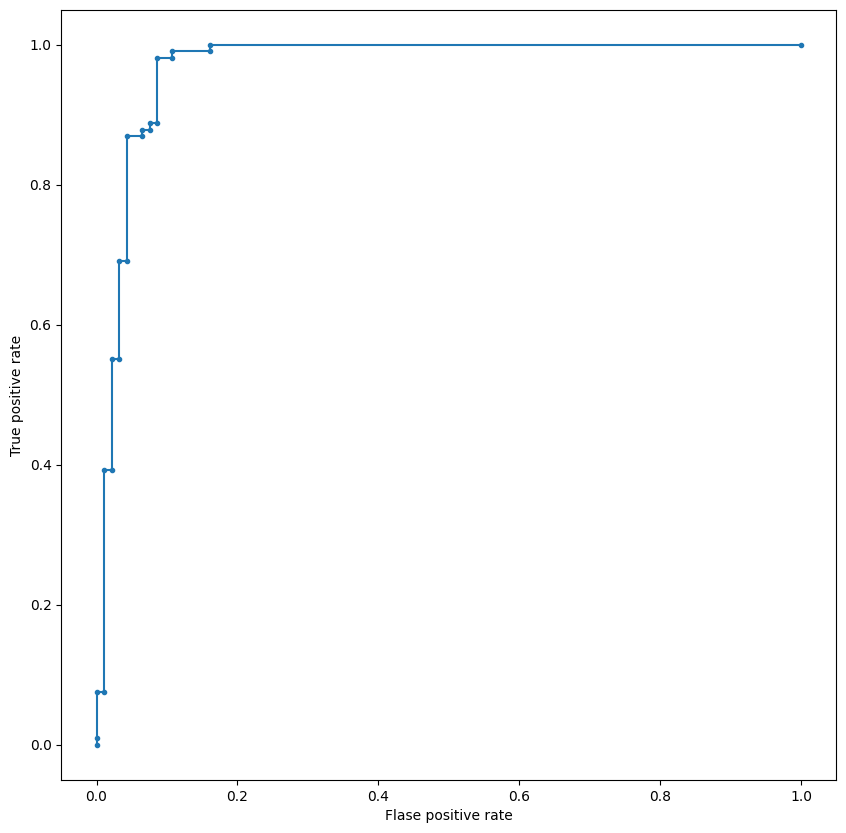

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('Flase positive rate')
plt.ylabel('True positive rate')

In [40]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, model_prob))

0.9691488292633906


# **Approx 97% of the area is under the curve, it means our model is really good in prediction. **
# **you can see even if the tpr is near to 1, still fpr is less than 0.2, thats good!!!**